In [1]:

import json
import yaml

    
def dict_array_upend(mydict,key,elem):
    if key not in mydict:
        mydict[key]=[]
    mydict[key.append(elem)]

def load_sensor_log_file(fname):
    response=[]
    first_timestamp=0
    f=open(fname,'r')
    for line in f.readlines():        
        dat=json.loads(line)
        timestamp=dat["timestamp"]-first_timestamp
        response.append(dat)
        if first_timestamp==0:                        
            first_timestamp=timestamp
    return response,first_timestamp
        

sensor_log,first_timestamp=load_sensor_log_file("../to_study/caterpillar_test.txt")

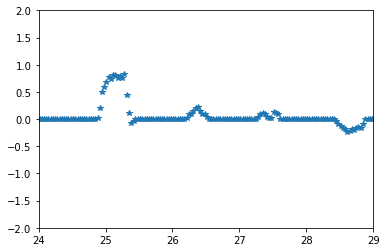

In [9]:
from matplotlib import pyplot as plt

vs=[]
ts=[]
start_timestamp=sensor_log[0]["timestamp"]
for message in sensor_log:
    t=message["timestamp"]-start_timestamp
    if "video_offset" in message:
        vs.append(message["video_offset"][2]/1000)
        ts.append(t)
plt.figure()
plt.ylim(-2,2)
plt.xlim(24,29)
plt.plot(ts,vs,'*')
plt.show()